In [13]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
DATADIR = './'

In [15]:
df = pd.read_csv(os.path.join(DATADIR, 'benchmark_result.csv'))
df = df.drop(['Index'], axis=1)

## Absolute timing plot

In [16]:
timings = df[['Equivalent Structures', 'T_supercell_real', 'T_shry_real']]
timings.columns = list(map(lambda x: x.replace(" ", "_"), timings.columns))

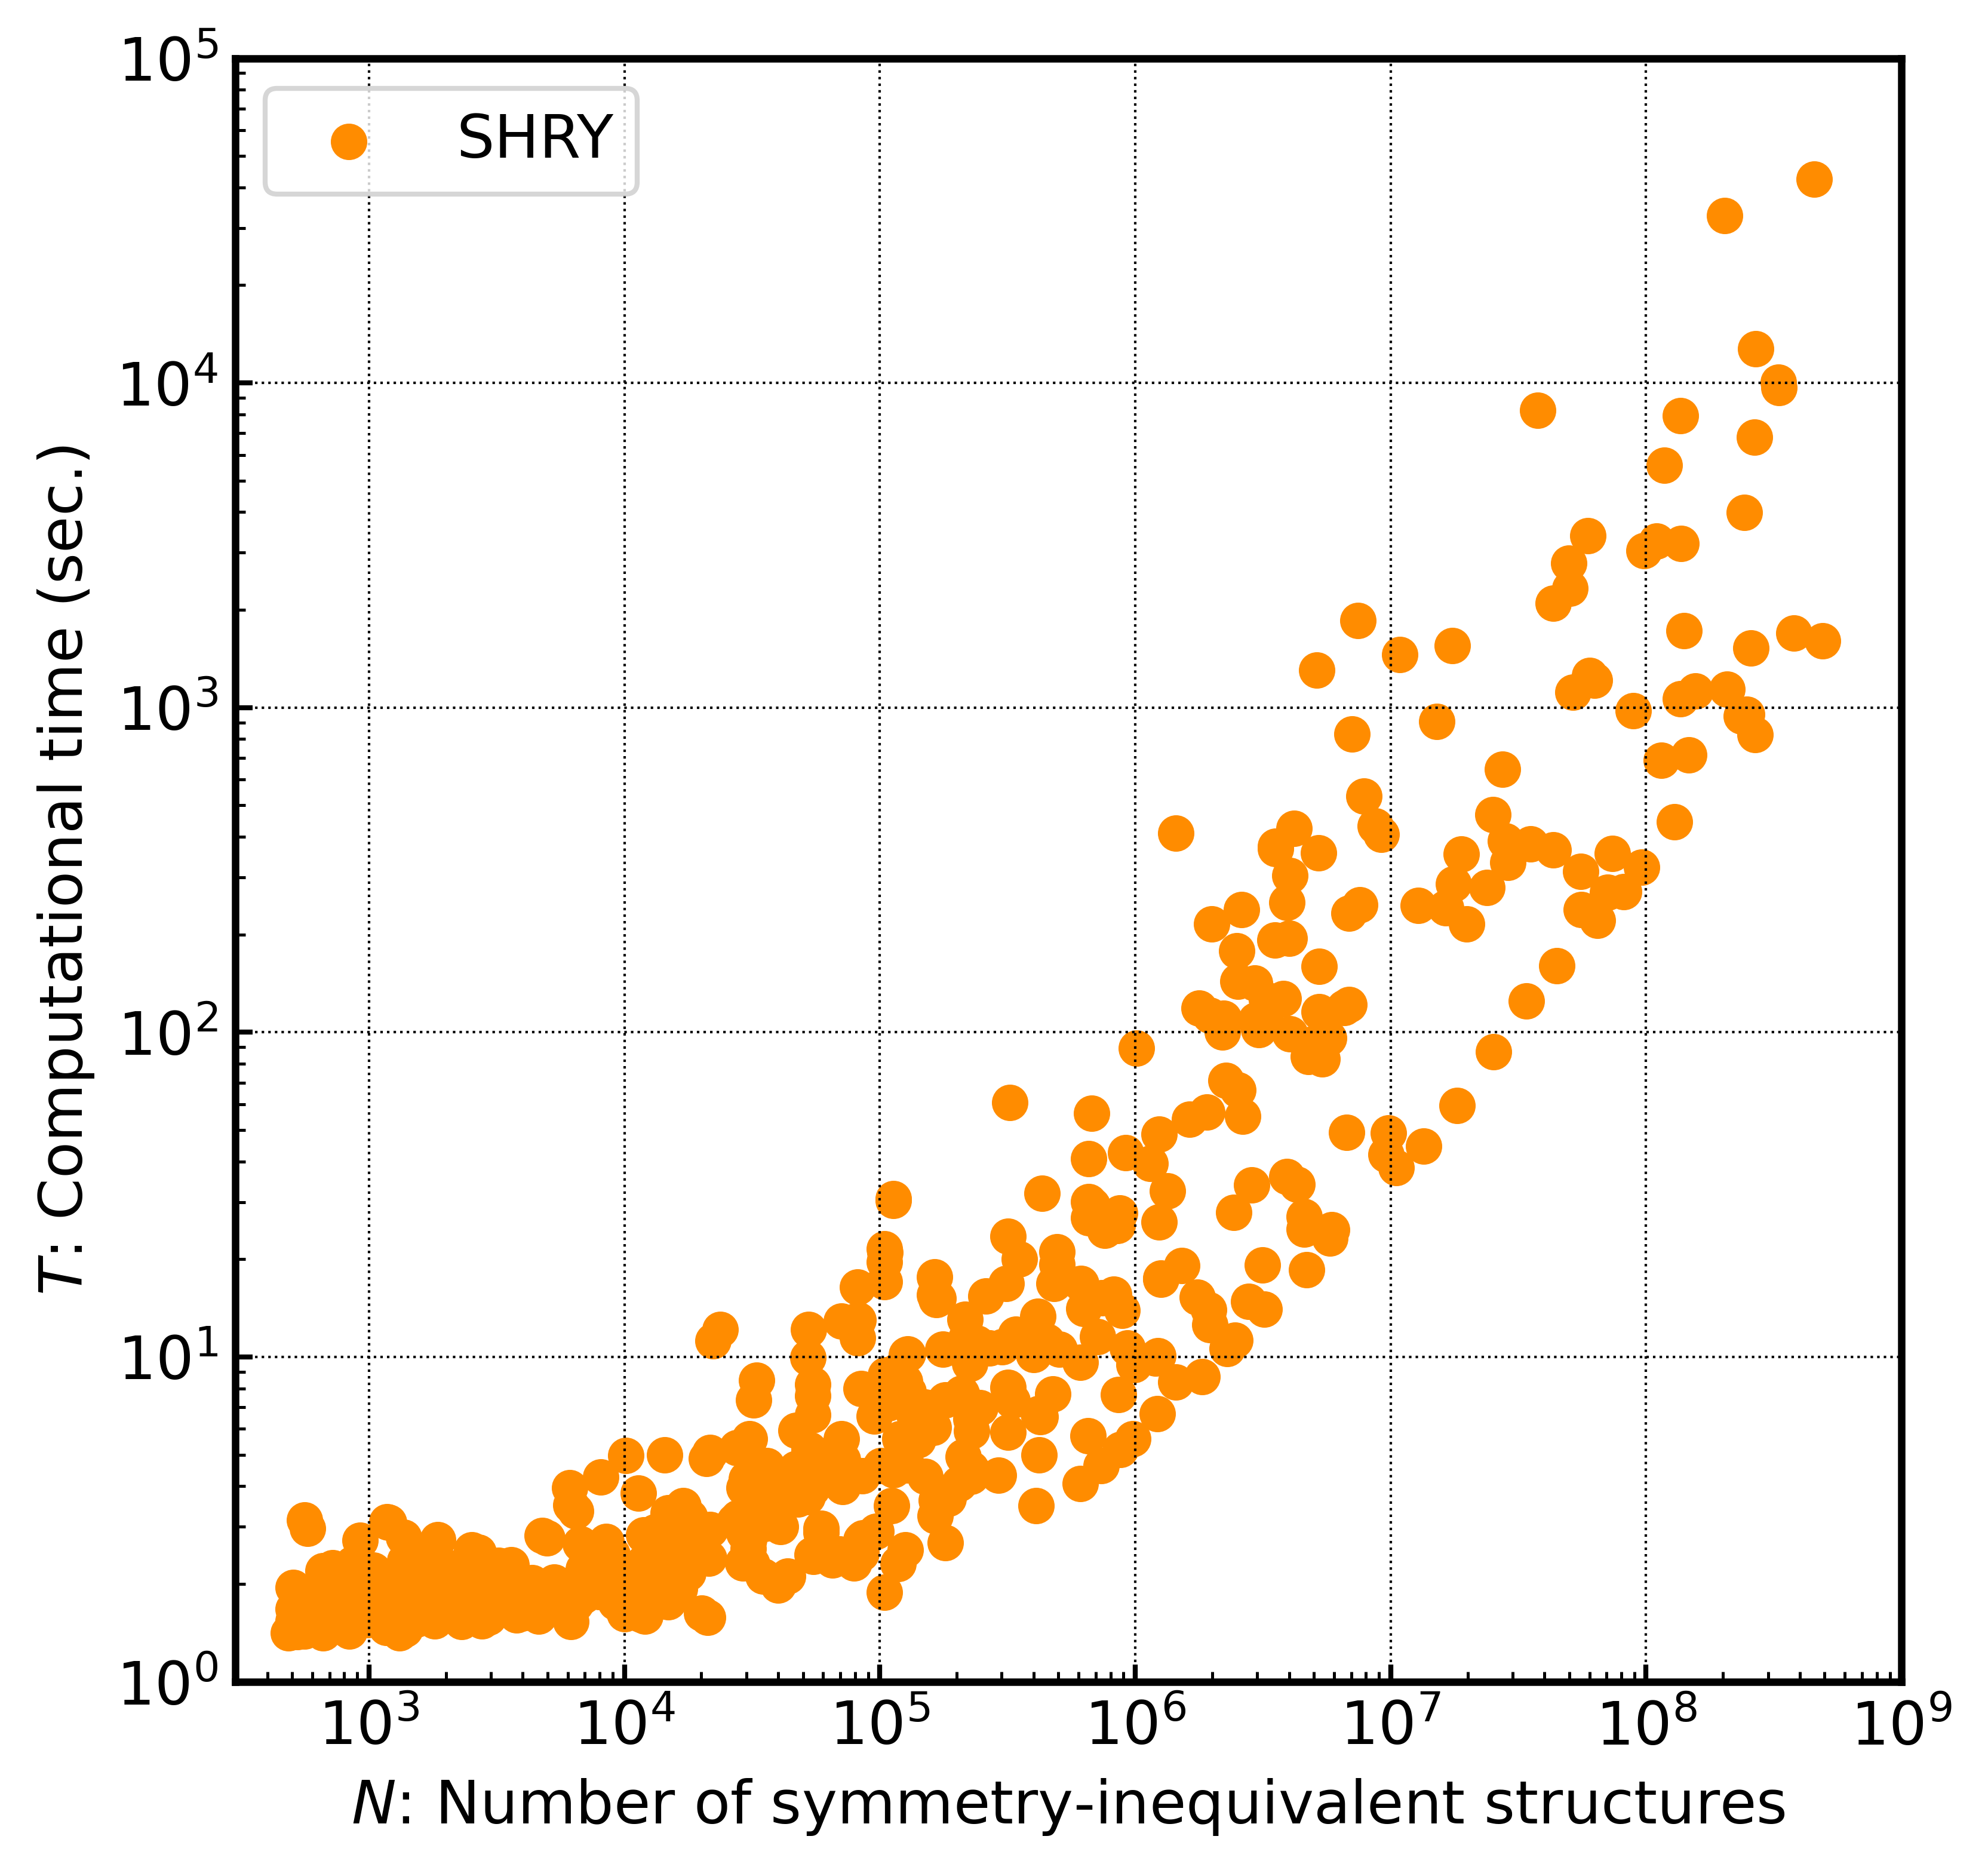

In [17]:
#plot Graph

plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 12 
plt.rcParams['axes.linewidth'] = 1.5

fig = plt.figure(figsize=(6, 6), facecolor='white', dpi=600)
ax1 = fig.add_subplot(1,1,1)

#ax1.scatter(timings.Equivalent_Structures, timings.T_supercell_real, marker="s", s=25, label=f'Supercell', color="royalblue")
ax1.scatter(timings.Equivalent_Structures, timings.T_shry_real, marker="o", s=40, label=f'SHRY', color="darkorange")

plt.legend()
ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlim(3e2,1e9)
ax1.set_ylim(1e0,1e5)
ax1.set_xlabel(r'$N$: Number of symmetry-inequivalent structures')
ax1.set_ylabel(r'$T$: Computational time (sec.)')
ax1.grid(which="major", color='k', linestyle='dotted', linewidth=0.5)

plt.savefig('shry_absolute_timings.png')
plt.show()

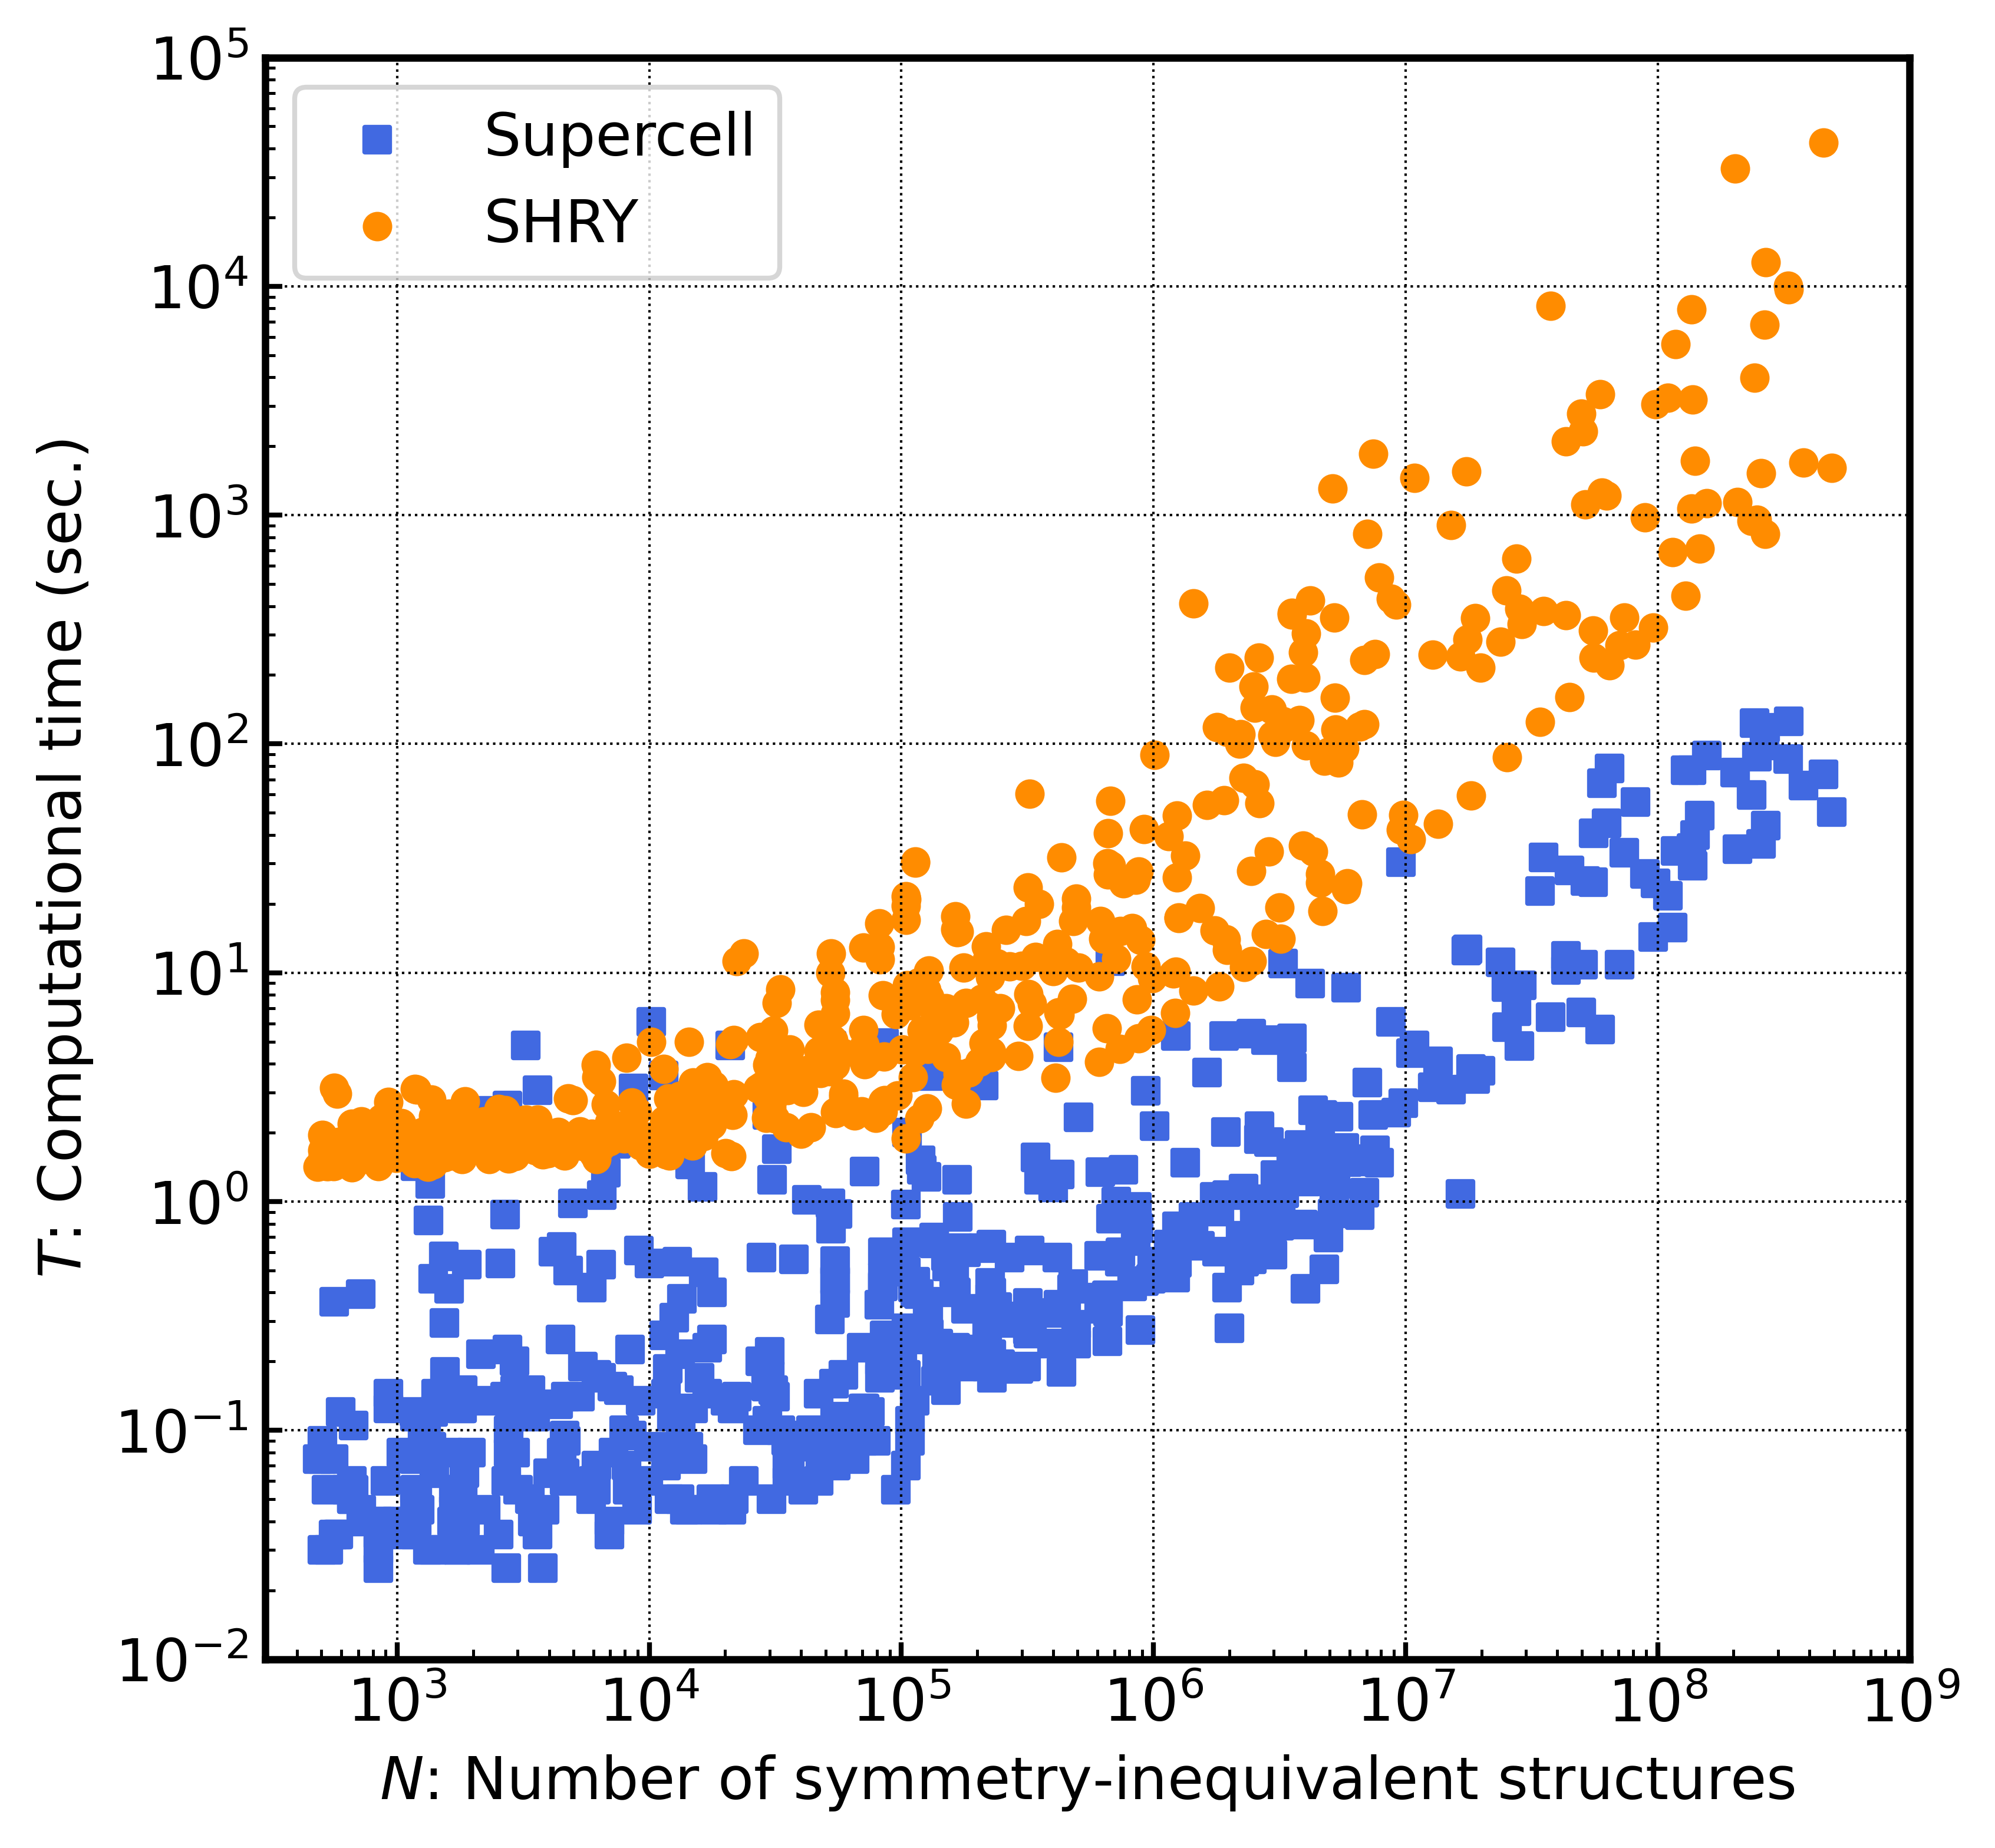

In [18]:
#plot Graph
plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['font.size'] = 12 
plt.rcParams['axes.linewidth'] = 1.5

fig = plt.figure(figsize=(6, 6), facecolor='white', dpi=600)
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(timings.Equivalent_Structures, timings.T_supercell_real, marker="s", s=25, label=f'Supercell', color="royalblue")
ax1.scatter(timings.Equivalent_Structures, timings.T_shry_real, marker="o", s=25, label=f'SHRY', color="darkorange")

plt.legend()
ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.set_xlim(3e2,1e9)
ax1.set_ylim(1e-2,1e5)
ax1.set_xlabel(r'$N$: Number of symmetry-inequivalent structures')
ax1.set_ylabel(r'$T$: Computational time (sec.)')
ax1.grid(which="major", color='k', linestyle='dotted', linewidth=0.5)

plt.savefig('shry_supercell_absolute_timings.png')
plt.show()

In [19]:
memories = df[['Equivalent Structures', 'M_shry_memory', 'M_supercell_memory']]
memories["M_shry_memory"]=memories["M_shry_memory"]/2**20 # KiB => GiB
memories["M_supercell_memory"]=memories["M_supercell_memory"]/2**20 # KiB => GiB
memories.columns = list(map(lambda x: x.replace(" ", "_"), memories.columns))

In [20]:
# max memory
print(f"Max memory in the SHRY: {np.max(memories['M_shry_memory'])} GiB")
print(f"Max memory in the Supercell: {np.max(memories['M_supercell_memory'])} GiB")

Max memory in the SHRY: 11.993768692016602 GiB
Max memory in the Supercell: 0.2884063720703125 GiB
